In [1]:
import numpy as np

In [2]:
# manual synthetic data

# Feature(s)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)

# Target
y = np.array([1.1, 2.9, 3.7, 4.5, 5.2, 6.3, 7.5, 8.3, 9.2, 10.1]) 

In [4]:
from sklearn.linear_model import LinearRegression

# Hold-out cross validation
- Split the sample into 2 sets (typically, 70:30 OR 80:20)
- Use the larger set for training
- Use the smaller set for validation

In [5]:
# Manual train-test split
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [6]:
X_train

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [7]:
X_test

array([[ 9],
       [10]])

In [8]:
y_train

array([1.1, 2.9, 3.7, 4.5, 5.2, 6.3, 7.5, 8.3])

In [9]:
y_test

array([ 9.2, 10.1])

In [10]:
# Training the model
model = LinearRegression()

# fit = find out the bias and the weights
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Parameters "learnt" by the model
print("bias = ", model.intercept_)
print("weight = ", model.coef_)

bias =  0.5499999999999989
weight =  [0.975]


In [12]:
# Cross Validation
y_pred = model.predict(X_test)

In [13]:
y_pred

array([ 9.325, 10.3  ])

### **Metrics**
1. ### **R-Square (R²)**

The **R-Square (R²) score**, also called the **coefficient of determination**, is a statistical measure that indicates how well the independent variable(s) OR features explain the variance in the dependent variable OR target.

#### **Formula:**
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$
Where:
- $ SS_{res} $  = **Residual Sum of Squares (RSS)**  
  $$
  SS_{res} = \sum (y_{true} - y_{pred})^2
  $$
  This represents the total squared differences between actual values ($y_{true}$ ) and predicted values ($y_{pred}$ ).

- $ SS_{tot} $  = **Total Sum of Squares (TSS)**  
  $$
  SS_{tot} = \sum (y_{true} - \bar{y})^2
  $$
  This represents the squared differences between actual values ($y_{true}$ ) and the **mean** of actual values ($\bar{y}$ ).

### **Interpretation of R²**
- **R² = 1:** Perfect fit (all data points lie on the regression line).
- **R² = 0:** The model does not explain any variance in the dependent variable.
- **R² < 0:** The model performs worse than a simple mean-based model (bad fit).

### **Example Calculation**
Let's assume we have:
- **Actual values**: $ y_{true} = [3, 5, 7, 9] $ 
- **Predicted values**: $ y_{pred} = [2.8, 5.2, 6.8, 9.1] $ 
- **Mean of actual values**: $ \bar{y} = (3+5+7+9)/4 = 6 $ 

Now, compute the sum of squares:

1. **Compute:** $ SS_{res} $ 
   $$
   (3 - 2.8)^2 + (5 - 5.2)^2 + (7 - 6.8)^2 + (9 - 9.1)^2
   $$
   $$
   = (0.2)^2 + (-0.2)^2 + (0.2)^2 + (-0.1)^2 = 0.04 + 0.04 + 0.04 + 0.01 = 0.13
   $$

2. **Compute:** $ SS_{tot} $ 
   $$
   (3 - 6)^2 + (5 - 6)^2 + (7 - 6)^2 + (9 - 6)^2
   $$
   $$
   = (-3)^2 + (-1)^2 + (1)^2 + (3)^2 = 9 + 1 + 1 + 9 = 20
   $$

3. **Compute:** $ R^2 $ 
   $$
   R^2 = 1 - \frac{0.13}{20} = 1 - 0.0065 = 0.9935
   $$

**Conclusion**
- The **R² score of 0.9935** means that **99.35% of the variance in the dependent variable is explained by the model**.
- A high R² value indicates a strong model fit.



2. **Mean Squared Error (MSE)**:
   - Measures the average squared difference between actual and predicted values.
   - A lower MSE indicates better performance.
   - Formula:  
     $$
     MSE = \frac{1}{n} \sum (y_{true} - y_{pred})^2
     $$
   - `mean_squared_error(y_test, y_pred)`

 **Key Interpretations:**
1. **Lower MSE = Better Fit**  
   - A lower MSE indicates that the model's predictions are closer to the actual values, meaning better accuracy.

2. **Higher MSE = Poor Fit**  
   - A higher MSE suggests that the model's predictions deviate significantly from the actual values, indicating poor performance.

3. **Squared Differences Impact**  
   - Since errors are squared, larger errors contribute disproportionately more to the MSE. This makes MSE sensitive to large outliers.

4. **Units of MSE**  
   - MSE is expressed in the squared units of the dependent variable. For example, if predicting **house prices in dollars**, MSE would be in **square dollars ($²)**, which can be hard to interpret directly.

5. **Comparing Models**  
   - When comparing multiple models, the one with the **lower MSE** is usually preferred, assuming similar complexity.

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculating model accuracy
r2 = r2_score(y_test, y_pred)
print(f"Model Accuracy (R^2 Score): {r2:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Model Accuracy (MSE): {mse:.4f}")

Model Accuracy (R^2 Score): 0.8627
Model Accuracy (MSE): 0.0278


In [15]:
# Predicting a sample (Using the trained model)
sample_value = np.array([[4.9]])
predicted_value = model.predict(sample_value)
print(f"Predicted value for input {sample_value.flatten()[0]}: {predicted_value.flatten()[0]}")

Predicted value for input 4.9: 5.327500000000001


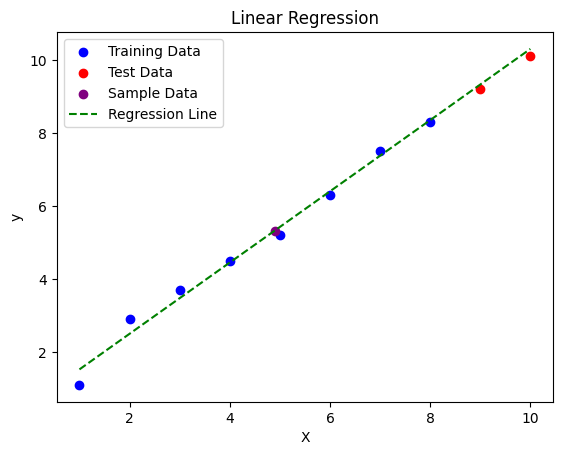

In [16]:
#Visualization
import matplotlib.pyplot as plt

# Plot results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.scatter([sample_value], [predicted_value], color='purple', label='Sample Data')
plt.plot(X, model.predict(X), color='green', linestyle='dashed', label='Regression Line')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()